## 1. 탐색적 분석
### a. 핵심 기술 통계량

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
import sys
print(sys.executable)

C:\Users\82103\anaconda3\python.exe


In [3]:
from nltk.corpus import gutenberg
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
df = pd.DataFrame(columns=['fileid', 'num_chars', 'num_words', 'num_sents', 'num_vocab', 'c/w', 'w/s', 'w/v'])
for fileid in gutenberg.fileids(): # Get a list of all data files that make up a corpus
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    df = df.append(pd.DataFrame([[fileid, num_chars, num_words, num_sents, num_vocab, num_chars/num_words, num_words/num_sents,num_words/num_vocab]], columns=['fileid', 'num_chars', 'num_words', 'num_sents', 'num_vocab', 'c/w', 'w/s', 'w/v']), ignore_index=True)

In [6]:
df.set_index('fileid', inplace=True)
df = df.astype('float')
df.reset_index(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fileid     18 non-null     object 
 1   num_chars  18 non-null     float64
 2   num_words  18 non-null     float64
 3   num_sents  18 non-null     float64
 4   num_vocab  18 non-null     float64
 5   c/w        18 non-null     float64
 6   w/s        18 non-null     float64
 7   w/v        18 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.2+ KB


In [8]:
df #corpus의 document별 char개수, word개수, sent개수, vaca개수를 dataframe에 담음

,fileid,num_chars,num_words,num_sents,num_vocab,c/w,w/s,w/v
0,austen-emma.txt,887071.0,192427.0,7752.0,7344.0,4.609909,24.822884,26.201934
1,austen-persuasion.txt,466292.0,98171.0,3747.0,5835.0,4.749794,26.199893,16.824507
2,austen-sense.txt,673022.0,141576.0,4999.0,6403.0,4.753786,28.320864,22.110886
3,bible-kjv.txt,4332554.0,1010654.0,30103.0,12767.0,4.286882,33.573199,79.161432
4,blake-poems.txt,38153.0,8354.0,438.0,1535.0,4.567034,19.073059,5.442345
5,bryant-stories.txt,249439.0,55563.0,2863.0,3940.0,4.489300,19.407265,14.102284
6,burgess-busterbrown.txt,84663.0,18963.0,1054.0,1559.0,4.464642,17.991461,12.163566
7,carroll-alice.txt,144395.0,34110.0,1703.0,2636.0,4.233216,20.029360,12.940061
8,chesterton-ball.txt,457450.0,96996.0,4779.0,8335.0,4.716174,20.296296,11.637193
9,chesterton-brown.txt,406629.0,86063.0,3806.0,7794.0,4.724783,22.612454,11.042212


In [9]:
df.describe()

,num_chars,num_words,num_sents,num_vocab,c/w,w/s,w/v
count,1.800000e+01,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000
mean,6.551843e+05,1.456452e+05,5475.111111,6825.555556,4.550169,23.455717,17.160986
std,9.781243e+05,2.276425e+05,6750.796414,4195.927006,0.187164,9.866006,16.530021
min,3.815300e+04,8.354000e+03,438.000000,1535.000000,4.233216,11.943135,5.442345
25%,1.490165e+05,3.492250e+04,1971.000000,3583.000000,4.379607,18.640459,10.775317
50%,4.320395e+05,9.144400e+04,3744.500000,6376.000000,4.579492,20.444482,12.300985
75%,7.016668e+05,1.515562e+05,4944.000000,8419.000000,4.722631,26.132150,16.402534
max,4.332554e+06,1.010654e+06,30103.000000,17231.000000,4.835735,52.309562,79.161432


### b. 그래프

In [10]:
label = range(0,18)
index = np.arange(len(label))

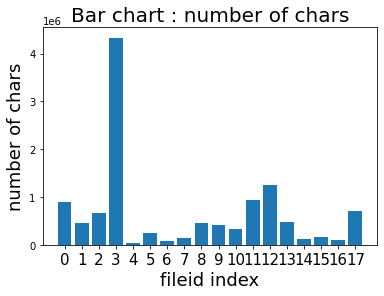

In [11]:
plt.bar(index, df['num_chars'])
plt.title('Bar chart : number of chars', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel('number of chars', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

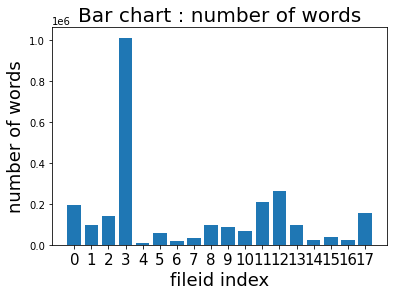

In [12]:
plt.bar(index, df['num_words'])
plt.title('Bar chart : number of words', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel('number of words', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

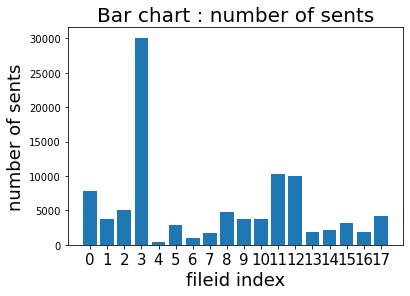

In [13]:
plt.bar(index, df['num_sents'])
plt.title('Bar chart : number of sents', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel('number of sents', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

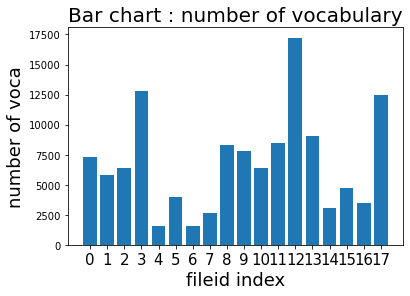

In [14]:
plt.bar(index, df['num_vocab'])
plt.title('Bar chart : number of vocabulary', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel('number of voca', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

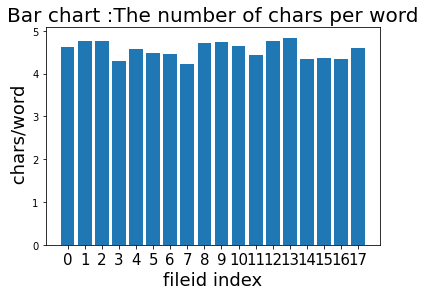

In [15]:
plt.bar(index, df['c/w'])
plt.title('Bar chart :The number of chars per word', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel(' chars/word', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

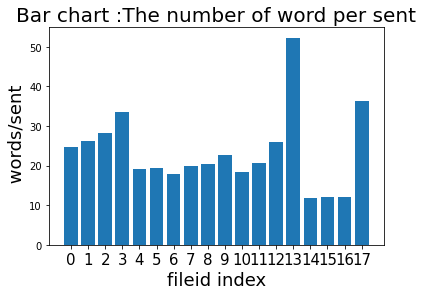

In [16]:
plt.bar(index, df['w/s'])
plt.title('Bar chart :The number of word per sent', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel(' words/sent', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

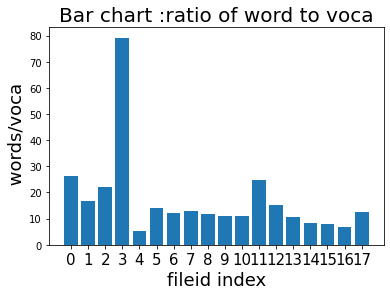

In [17]:
plt.bar(index, df['w/v'])
plt.title('Bar chart :ratio of word to voca', fontsize=20)
plt.xlabel('fileid index', fontsize=18)
plt.ylabel(' words/voca', fontsize=18)
plt.xticks(index, label, fontsize= 15)
plt.show()

### c.wordcloud

In [18]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter

In [19]:
nltk.download('stopwords')
stoplist = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82103\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
tokenizer = RegexpTokenizer('[\w]+')

In [21]:
wc = WordCloud()

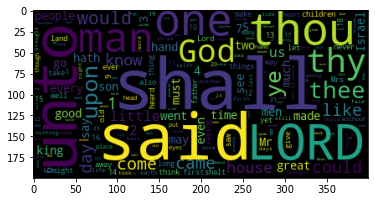

In [22]:
fwords=[]
for fileid in gutenberg.fileids():
    document = gutenberg.raw(fileid)
    words = tokenizer.tokenize(document)
    words = [word for word in words if word.lower() not in stoplist]
    fwords.extend(words)
fdist = Counter(fwords)
wc.generate_from_frequencies(fdist)
plt.imshow(wc)

## 2. 저자 내의 작품간 차이점과 공통점
### a. Austen

In [23]:
from nltk.tokenize import TreebankWordTokenizer

In [24]:
tokenizer = TreebankWordTokenizer()

In [25]:
austen1 = gutenberg.raw(fileids = 'austen-emma.txt')
austen2 = gutenberg.raw(fileids = 'austen-persuasion.txt')
austen3 = gutenberg.raw(fileids = 'austen-sense.txt')
austen = austen1+austen2+austen3

austen = re.sub(r'[0-9]+', '', austen)
austen_clean = re.sub(r'[^a-zA-Z0-9\s]+', '', austen)

In [26]:
austen1 = re.sub(r'[0-9]+', '', austen1)
austen1_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', austen1)
austen2 = re.sub(r'[0-9]+', '', austen2)
austen2_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', austen2)
austen3 = re.sub(r'[0-9]+', '', austen3)
austen3_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', austen3)

In [27]:
from nltk.tokenize import sent_tokenize
from nltk import Text

In [28]:
austen1_sentences = sent_tokenize(text=austen1_clean)
austen2_sentences = sent_tokenize(text=austen2_clean)
austen3_sentences = sent_tokenize(text=austen3_clean)
austen1_words = tokenizer.tokenize(austen1_clean)
filtered_austen1_words = [word for word in austen1_words if word.lower() not in stoplist]
text_austen1 = Text(filtered_austen1_words, name="austen1")
austen2_words = tokenizer.tokenize(austen2_clean)
filtered_austen2_words = [word for word in austen2_words if word.lower() not in stoplist]
text_austen2 = Text(filtered_austen2_words, name="austen2")
austen3_words = tokenizer.tokenize(austen3_clean)
filtered_austen3_words = [word for word in austen3_words if word.lower() not in stoplist]
text_austen3 = Text(filtered_austen3_words, name="austen3")

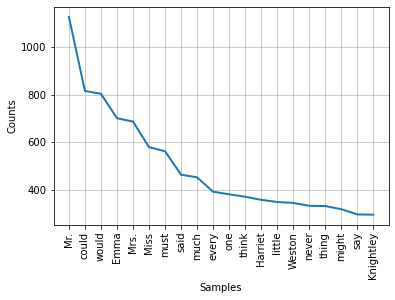

In [29]:
text_austen1.plot(20)

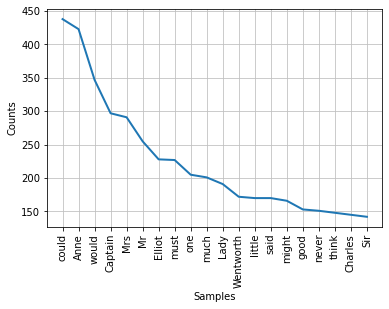

In [30]:
text_austen2.plot(20)

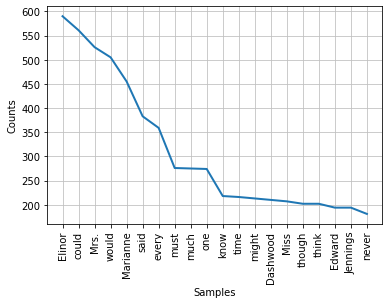

In [31]:
text_austen3.plot(20)

In [32]:
text_austen1.collocations(10)

Mr. Knightley; Mrs. Weston; Frank Churchill; Miss Woodhouse; Mr.
Elton; Miss Bates; Miss Fairfax; every thing; Mrs. Elton; Mr. Weston


In [33]:
text_austen2.collocations(10)

Captain Wentworth; Lady Russell; Sir Walter; Mrs Clay; Mrs Smith;
Captain Benwick; Mrs Musgrove; Camden Place; great deal; Lady Russells


In [34]:
text_austen3.collocations(10)

Mrs. Jennings; Colonel Brandon; Sir John; Lady Middleton; Mrs.
Dashwood; every thing; Mrs. Ferrars; Miss Dashwood; thousand pounds;
dare say


### b. Chesterton

In [35]:
cheserton1 = gutenberg.raw(fileids = 'chesterton-ball.txt')
cheserton2 = gutenberg.raw(fileids = 'chesterton-brown.txt')
cheserton3 = gutenberg.raw(fileids = 'chesterton-thursday.txt')
cheserton = cheserton1+cheserton2+cheserton3

cheserton = re.sub(r'[0-9]+', '', cheserton)
cheserton_clean = re.sub(r'[^a-zA-Z0-9\s]+', '', cheserton)

cheserton1 = re.sub(r'[0-9]+', '', cheserton1)
cheserton1_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', cheserton1)
cheserton2 = re.sub(r'[0-9]+', '', cheserton2)
cheserton2_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', cheserton2)
cheserton3 = re.sub(r'[0-9]+', '', cheserton3)
cheserton3_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', cheserton3)

cheserton1_sentences = sent_tokenize(text=cheserton1_clean)
cheserton2_sentences = sent_tokenize(text=cheserton2_clean)
cheserton3_sentences = sent_tokenize(text=cheserton3_clean)

cheserton1_words = tokenizer.tokenize(cheserton1_clean)
filtered_cheserton1_words = [word for word in cheserton1_words if word.lower() not in stoplist]
text_cheserton1 = Text(filtered_cheserton1_words, name="cheserton1")
cheserton2_words = tokenizer.tokenize(cheserton2_clean)
filtered_cheserton2_words = [word for word in cheserton2_words if word.lower() not in stoplist]
text_cheserton2 = Text(filtered_cheserton2_words, name="cheserton2")
cheserton3_words = tokenizer.tokenize(cheserton3_clean)
filtered_cheserton3_words = [word for word in cheserton3_words if word.lower() not in stoplist]
text_cheserton3 = Text(filtered_cheserton3_words, name="cheserton3")

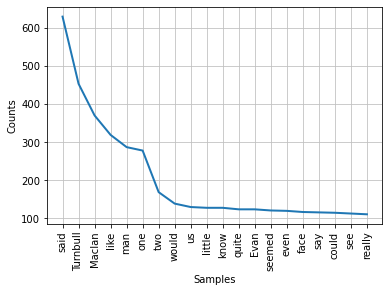

In [36]:
text_cheserton1.plot(20)

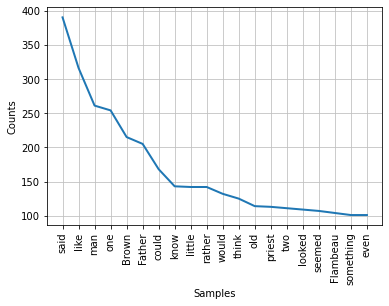

In [37]:
text_cheserton2.plot(20)

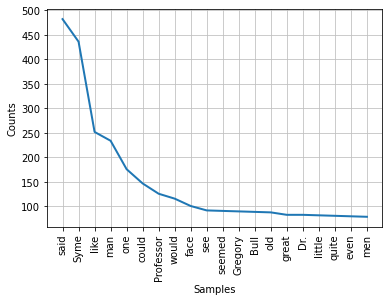

In [38]:
text_cheserton3.plot(20)

In [39]:
text_cheserton1.collocations(10)

said Turnbull; Project Gutenberg; said MacIan; Cumberland Vane; Fleet
Street; Dr. Quayle; editor Atheist; Count Gregory; Ludgate Hill;
flying ship


In [40]:
text_cheserton2.collocations(10)

Father Brown; Father Brown.; said Father; Sir Wilson; Sir Claude;
little priest; dont know; Wilson Seymour; King Thieves; looked like


In [41]:
text_cheserton3.collocations(10)

Dr. Bull; said Syme; Dr. Renard; Dr. Bull.; said Professor; Comrade
Gregory; said Dr.; Colonel Ducroix; red hair; old gentleman


### 3. Shakespeare

In [42]:
shakespeare1 = gutenberg.raw(fileids = 'shakespeare-caesar.txt')
shakespeare2 = gutenberg.raw(fileids = 'shakespeare-hamlet.txt')
shakespeare3 = gutenberg.raw(fileids = 'shakespeare-macbeth.txt')
shakespeare = shakespeare1+shakespeare2+shakespeare3

shakespeare = re.sub(r'[0-9]+', '', shakespeare)
shakespeare_clean = re.sub(r'[^a-zA-Z0-9\s]+', '', shakespeare)

shakespeare1 = re.sub(r'[0-9]+', '', shakespeare1)
shakespeare1_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', shakespeare1)
shakespeare2 = re.sub(r'[0-9]+', '', shakespeare2)
shakespeare2_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', shakespeare2)
shakespeare3 = re.sub(r'[0-9]+', '', shakespeare3)
shakespeare3_clean = re.sub(r'[^a-zA-Z0-9\s.]+', '', shakespeare3)

shakespeare1_sentences = sent_tokenize(text=shakespeare1_clean)
shakespeare2_sentences = sent_tokenize(text=shakespeare2_clean)
shakespeare3_sentences = sent_tokenize(text=shakespeare3_clean)

shakespeare1_words = tokenizer.tokenize(shakespeare1_clean)
filtered_shakespeare1_words = [word for word in shakespeare1_words if word.lower() not in stoplist]
text_shakespeare1 = Text(filtered_shakespeare1_words, name="shakespeare1")
shakespeare2_words = tokenizer.tokenize(shakespeare2_clean)
filtered_shakespeare2_words = [word for word in shakespeare2_words if word.lower() not in stoplist]
text_shakespeare2 = Text(filtered_shakespeare2_words, name="shakespeare2")
shakespeare3_words = tokenizer.tokenize(shakespeare3_clean)
filtered_shakespeare3_words = [word for word in shakespeare3_words if word.lower() not in stoplist]
text_shakespeare3 = Text(filtered_shakespeare3_words, name="shakespeare3")

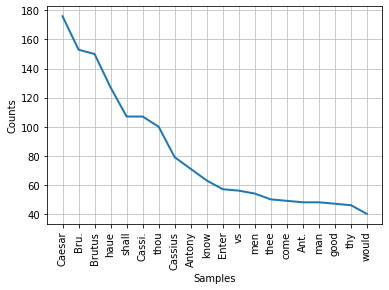

In [43]:
text_shakespeare1.plot(20)

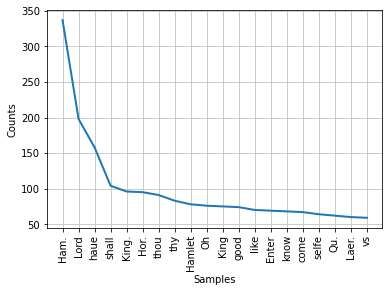

In [44]:
text_shakespeare2.plot(20)

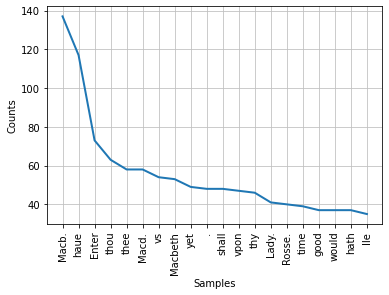

In [45]:
text_shakespeare3.plot(20)

In [46]:
text_shakespeare1.collocations(10)

Mark Antony; Marke Antony; Ides March; Metellus Cymber; Good morrow;
thou art; mine owne; Exeunt. Manet; Lord Bru.; Enter Lucius.


In [47]:
text_shakespeare2.collocations(10)

Lord Ham.; Exeunt. Enter; haue seene; haue heard; set downe; thou
hast; good Lord; Fathers death; Enter King; Rosincrance Guildensterne.


In [48]:
text_shakespeare3.collocations(10)

Exeunt. Scena; Thane Cawdor; Enter Macbeth.; Scena Secunda.; Old man.;
three Witches.; Knock. Knock; Fire burne; weyward Sisters; good Lord


In [49]:
austen_words = tokenizer.tokenize(austen_clean)
filtered_austen_words = [word for word in austen_words if word.lower() not in stoplist]
cheserton_words = tokenizer.tokenize(cheserton_clean)
filtered_cheserton_words = [word for word in cheserton_words if word.lower() not in stoplist]
shakespeare_words = tokenizer.tokenize(shakespeare_clean)
filtered_shakespeare_words = [word for word in shakespeare_words if word.lower() not in stoplist]

In [50]:
print(len(austen_words))
print(len(filtered_austen_words))
print(len(cheserton_words))
print(len(filtered_cheserton_words))
print(len(shakespeare_words))
print(len(filtered_shakespeare_words))

360277
164649
211110
103271
67668
36821


## 3. 3명의 작가간 분석

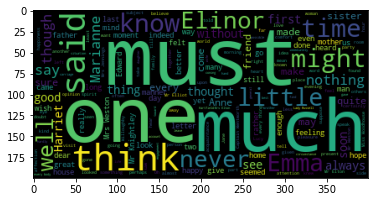

In [51]:
austenwc = ' '.join(filtered_austen_words)
wc.generate(austenwc)
plt.imshow(wc)

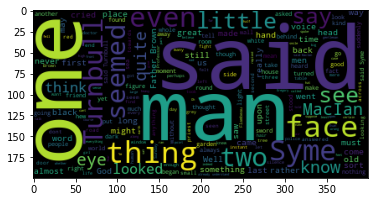

In [52]:
chesertonwc = ' '.join(filtered_cheserton_words)
wc.generate(chesertonwc)
plt.imshow(wc)

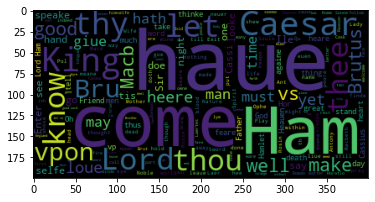

In [53]:
shakespearewc = ' '.join(filtered_shakespeare_words)
wc.generate(shakespearewc)
plt.imshow(wc)

In [54]:
nltk.download('punkt')
austen_sentences = sent_tokenize(text=austen)
cheserton_sentences = sent_tokenize(text=cheserton)
shakespeare_sentences = sent_tokenize(text=shakespeare)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82103\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
print(len(austen_sentences))
print(len(cheserton_sentences))
print(len(shakespeare_sentences))

15977
11923
5413


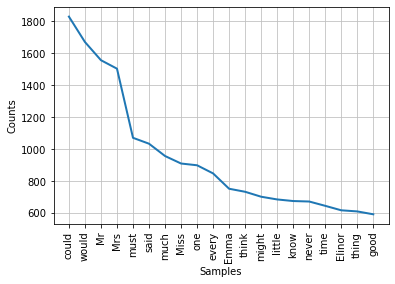

In [56]:
# 빈도수 높은 20위 단어의 사용 빈도

text_austen_words = Text(filtered_austen_words)
text_austen_words.plot(20)

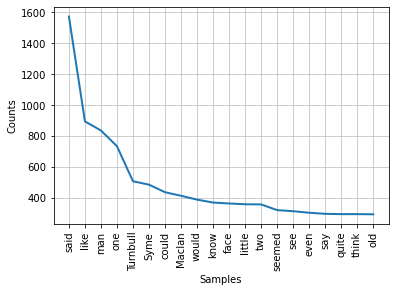

In [57]:
# 빈도수 높은 20위 단어의 사용 빈도
text_cheserton_words = Text(filtered_cheserton_words)
text_cheserton_words.plot(20)

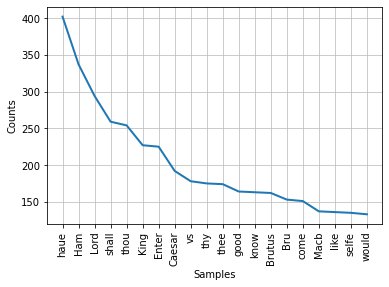

In [58]:
# 빈도수 높은 20위 단어의 사용 빈도

text_shakespeare_words = Text(filtered_shakespeare_words)
text_shakespeare_words.plot(20)

In [62]:
text_austen_words.collocations(10)

Captain Wentworth; Mrs Jennings; Mrs Weston; Lady Russell; Frank
Churchill; Sir Walter; Colonel Brandon; every thing; great deal; Miss
Woodhouse


In [63]:
text_cheserton_words.collocations(10)

Father Brown; said Syme; said Turnbull; Project Gutenberg; said
MacIan; said Father; could see; dont know; first time; Ludgate Hill


In [64]:
text_shakespeare_words.collocations(10)

Lord Ham; Exeunt Scena; Thane Cawdor; Mark Antony; haue seene; thou
art; Knock Knock; mine owne; Marke Antony; Scena Secunda


## 4. 추가적인 text analytics

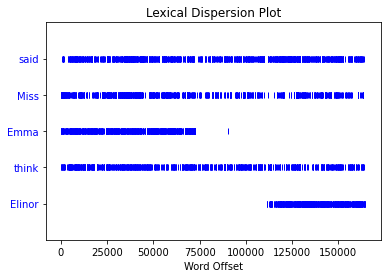

In [59]:
#단어가 사용된 위치를 분산 그래프로 시각화
text_austen_words.dispersion_plot(["said", "Miss", "Emma", "think", "Elinor"])

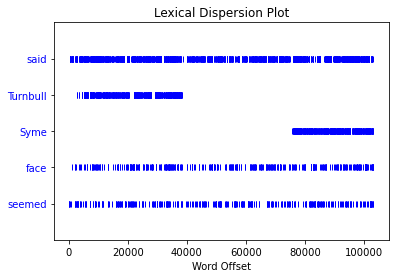

In [60]:
#단어가 사용된 위치를 분산 그래프로 시각화
text_cheserton_words.dispersion_plot(["said","Turnbull", "Syme", "face", "seemed"])

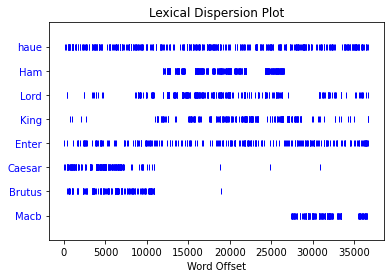

In [61]:
#단어가 사용된 위치를 분산 그래프로 시각화
text_shakespeare_words.dispersion_plot(["haue", "Ham", "Lord", "King", "Enter", "Caesar", "Brutus", "Macb"])

In [65]:
text_austen_words.concordance("Emma")

Displaying 25 of 752 matches:
 Emma Jane Austen VOLUME CHAPTER Emma Wood
Emma Jane Austen VOLUME CHAPTER Emma Woodhouse handsome clever rich comfo
s friend fond daughters particularly Emma intimacy sisters Even Miss Taylor ce
ther friend friend mutually attached Emma liked highly esteeming Miss Taylors 
ught grief weddingday beloved friend Emma first sat mournful thought continuan
changeIt true friend going half mile Emma aware great must difference Mrs West
ylor even half day melancholy change Emma could sigh wish impossible things ti
al happier spent rest life Hartfield Emma smiled chatted cheerfully could keep
e daughter know hearing us able tell Emma spared exertions maintain happier fl
ly say poor Miss Taylor great regard Emma comes question dependence independen
o fanciful troublesome creature said Emma playfully head knowand would certain
ley fact one people could see faults Emma Woodhouse one ever told though parti
r told though particularly agreeable Emma knew would much less 